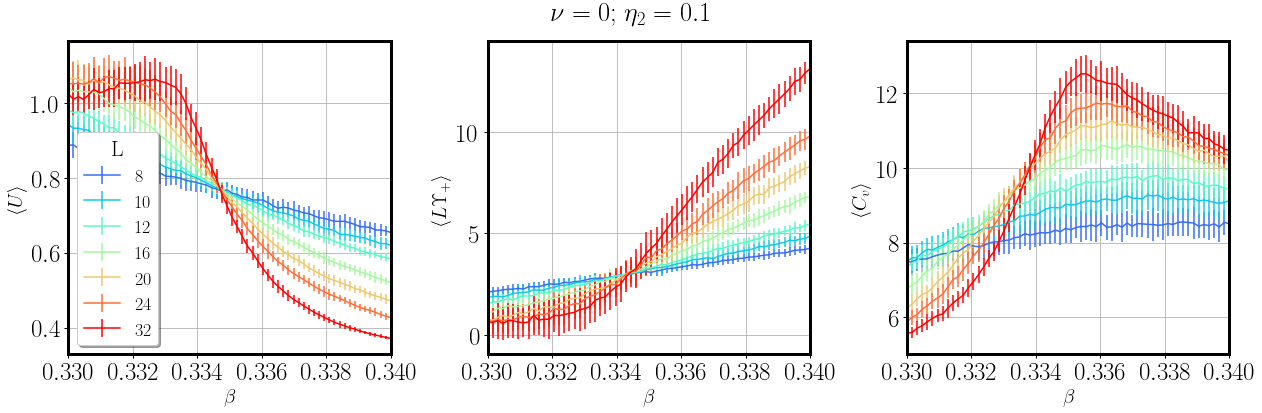

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.33
bhigh=0.34
Hinit=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")
ax1[0].set_xlim((0.33,0.34))
xticks = np.arange(0.33, 0.34, 0.002)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L", fontsize=18)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



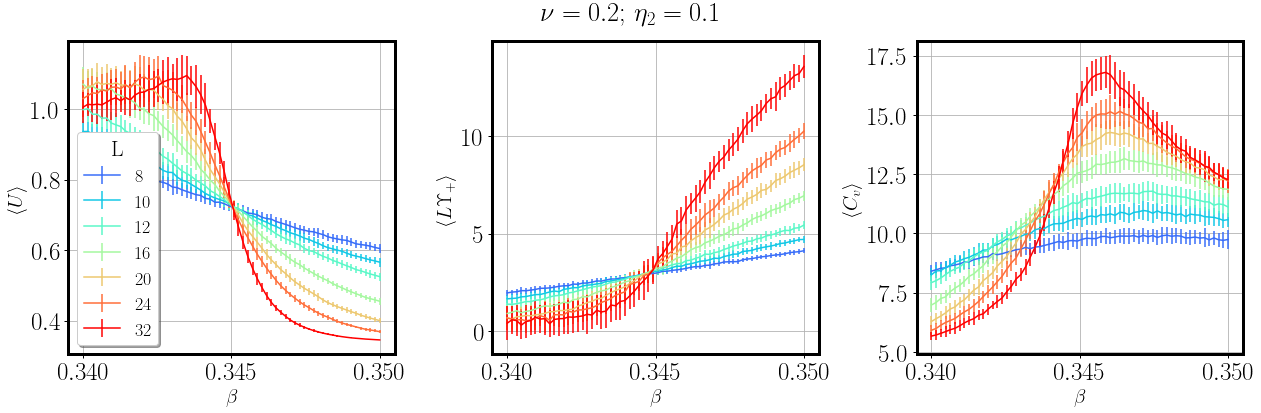

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.2
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.34
bhigh=0.35
Hinit=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L", ncol=1, fontsize=18)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



64


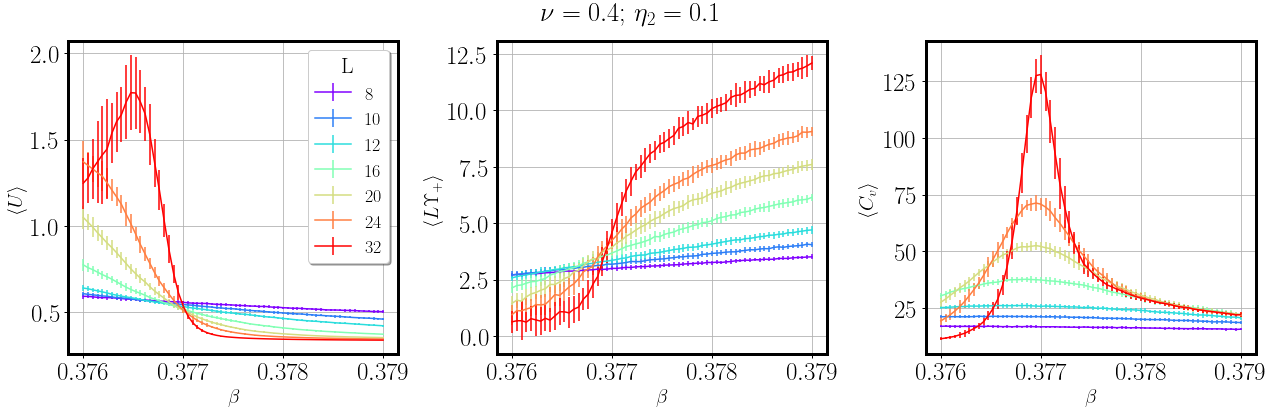

In [9]:


e=0
nu=0.4
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.376
bhigh=0.379
Hinit=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
#ax1[3].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
    
ax1[0].legend(loc="best", title="L", fontsize=18)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



8
10
12
16
20
24
32


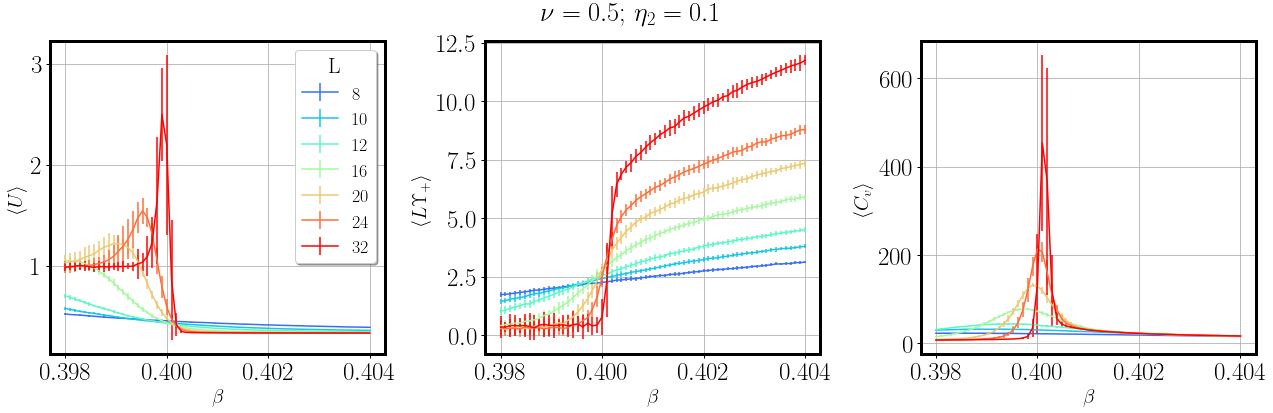

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.5
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.398
bhigh=0.404
Hinit="1"
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]#, 40]#, 44, 64]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v\rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
#ax1[3].grid()
# ax1[0].set_xlim((0.4,0.402))
# xticks = np.arange(0.4, 0.402, 0.0005)
# ax1[0].set_xticks(xticks)


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    print(L)
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[2].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=err_Cv, fmt="-", c=c_m, label="%s" %L)

ax1[0].legend(loc="best", title="L", fontsize="18")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )


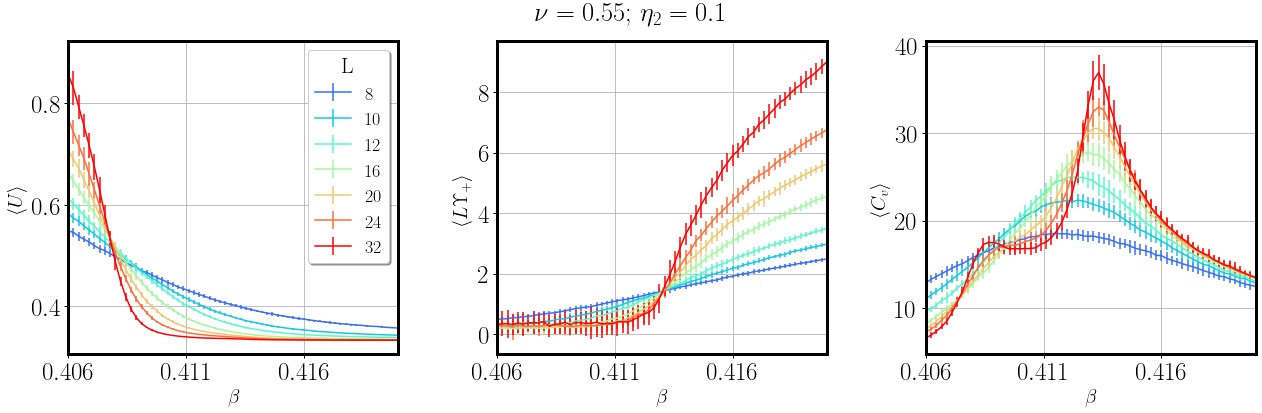

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.55
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.406
bhigh=0.42
Hinit=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")


ax1[0].set_xlim((0.406,0.42))
xticks = np.arange(0.406, 0.42, 0.005)
ax1[0].set_xticks(xticks)
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
#ax1[3].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    #ax1[1].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
ax1[0].legend(loc="best", title="L", fontsize="18")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )



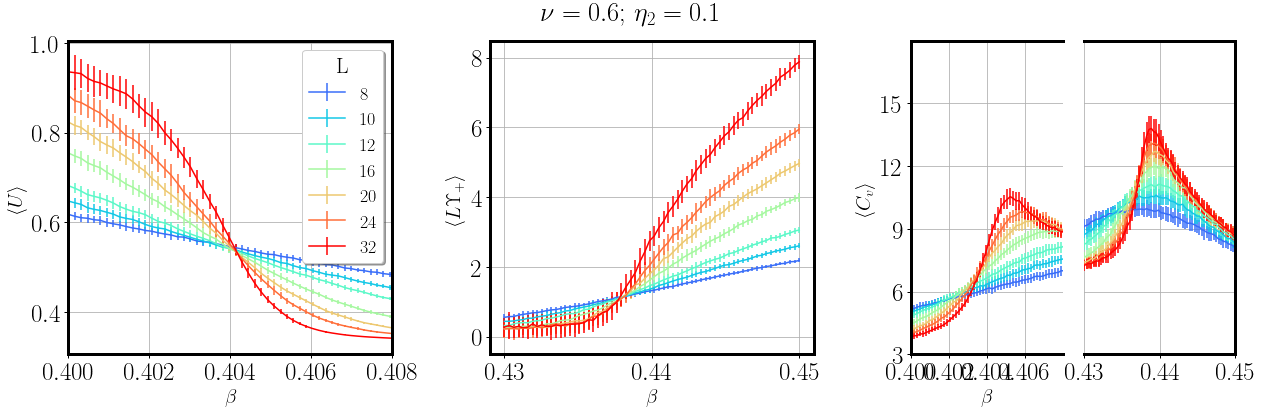

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.6
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.43
bhigh=0.45
blow_U=0.4
bhigh_U=0.41
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18,6))

fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))

ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")

ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
ax1[0].set_xlim(.4, .408)
#ax1[1].set_xlim(.432, .442)

from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = ax1[2]
divider = make_axes_locatable(ax)
ax2 = divider.new_horizontal(size="100%", pad=0.3)
fig.add_axes(ax2)

ax.set_xlim(.4, .408)
xticks = np.arange(0.4, 0.408, 0.002)
ax.set_xticks(xticks)

ax.set_ylim(3,18)
yticks = np.arange(3, 18, 3)
ax.set_yticks(yticks)
ax.spines['right'].set_visible(False)
ax2.set_ylim(3,18)
ax2.set_yticks(yticks)
ax2.set_xlim(0.43, 0.45)
xticks = np.arange(0.43, 0.45, 0.01)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.grid()
ax2.tick_params(left=False, labelleft=False)
ax2.spines['left'].set_visible(False)


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
        
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_Cv_U=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta_U= data_Cv_U[0]
    Cv_U= data_Cv_U[1]
    err_Cv_U= data_Cv_U[2]  
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    # ax1[2].errorbar(beta_U, Cv_U,yerr=err_Cv_U, fmt= "-", c=c_m, label="%s" %L)
    # ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)

    ax.errorbar(beta_U, Cv_U,yerr=err_Cv_U, fmt= "-", c=c_m, label="%s" %L)
    ax2.errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)


ax1[0].legend(loc="best", title="L", fontsize="18")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



# from brokenaxes import brokenaxes
# bax = brokenaxes(xlims=((.402, .415), (.43, .45)), subplot_spec=ax1[2])
# bax.errorbar(beta_U, Cv_U,yerr=err_Cv_U, fmt= "-", c=c_m, label="%s" %L)
# bax.errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)




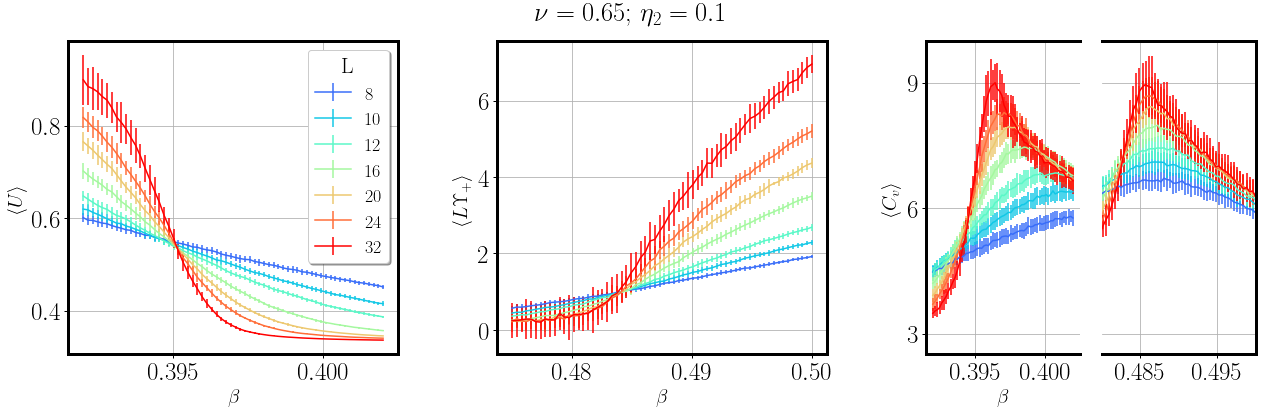

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.65
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.475
bhigh=0.5
blow_U=0.392
bhigh_U=0.402
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18,6))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$\langle U \rangle$")
ax1[1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
ax1[2].set_ylabel(r"$\langle C_v \rangle$")


ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
#
#ax1[0].set_ylim((0.32,1.1))
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = ax1[2]
divider = make_axes_locatable(ax)
ax2 = divider.new_horizontal(size="100%", pad=0.3)
fig.add_axes(ax2)

ax.set_ylim(2.5, 10)
yticks = np.arange(3, 10, 3)
ax.set_yticks(yticks)
ax.spines['right'].set_visible(False)
ax2.set_ylim(2.5,10)
ax2.set_yticks(yticks)
ax2.set_xlim(0.48, 0.5)
xticks = np.arange(0.485, 0.5, 0.01)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.grid()
ax2.tick_params(left=False, labelleft=False)
ax2.spines['left'].set_visible(False)

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]
    

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )

    
    data_Cv_U=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta_U= data_Cv_U[0]
    Cv_U= data_Cv_U[1]
    err_Cv_U= data_Cv_U[2]  
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax.errorbar(beta_U, Cv_U,yerr=err_Cv_U, fmt= "-", c=c_m, label="%s" %L)
    ax2.errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)

ax1[0].legend(loc="best", title="L", fontsize="18")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )

